In [158]:
import gdown as g_drive_download
import matplotlib.pyplot as plot
import numpy as np


Downloading data from Google Drive

In [159]:
def download_from_g_drive(file_id):
    download_link = f"https://drive.google.com/uc?id={file_id}"
    try:
        file_path = g_drive_download.download(download_link, quiet=True)
        if file_path:
            return file_path
        else:
            print("Failed to download the file using gdown.")
            return None
    except Exception as e:
        print(f"An error occurred while downloading the file: {e}")
        return None


train_data_file_path = download_from_g_drive("1ZJ7USoXN5Iijv_j-o8igJKD6w5jr5QPF")

Parsing csv from file

In [160]:
def parse_csv(csv_file_path):
    return np.loadtxt(csv_file_path, delimiter=',', skiprows=1)


train_data = parse_csv(train_data_file_path)

Displaying training values in view of table:

In [161]:
def display_table(data):
    if data.size != 0:
        for row in data:
            print(" | ".join(str(cell) for cell in row))
    else:
        print("No data to display.")


display_table(train_data)

0.0 | 0.0 | 20.14901424590337
1.0 | 0.010101010101010102 | 19.978722729850666
2.0 | 0.020202020202020204 | 20.234710601834248
3.0 | 0.030303030303030304 | 20.51751501752847
4.0 | 0.04040404040404041 | 20.010562068391078
5.0 | 0.05050505050505051 | 20.030769013925347
6.0 | 0.06060606060606061 | 20.59497596586434
7.0 | 0.07070707070707072 | 20.371644560160014
8.0 | 0.08080808080808081 | 20.020773845835677
9.0 | 0.09090909090909091 | 20.344586194893974
10.0 | 0.10101010101010102 | 20.062994894176462
11.0 | 0.11111111111111112 | 20.082503296151145
12.0 | 0.12121212121212122 | 20.315012923894052
13.0 | 0.13131313131313133 | 19.688642189228922
14.0 | 0.14141414141414144 | 19.765352933074375
15.0 | 0.15151515151515152 | 20.13434404425801
16.0 | 0.16161616161616163 | 20.019382987131994
17.0 | 0.17171717171717174 | 20.437708543212924
18.0 | 0.18181818181818182 | 20.09122914098
19.0 | 0.19191919191919193 | 19.960147273437798
20.0 | 0.20202020202020204 | 20.84373503471687
21.0 | 0.212121212121212

Displaying training value in dot view:

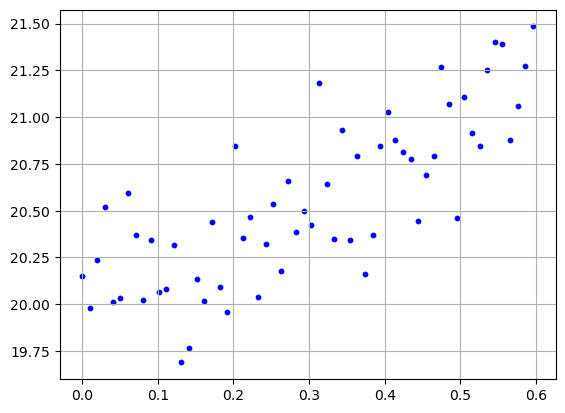

In [162]:
def display_dot(x_data, y_data, dot_color):
    plot.scatter(x_data, y_data, color=dot_color, s=10)
    plot.grid(True)
    plot.show()


train_data_x = train_data[:, 1]
train_data_y = train_data[:, 2]
display_dot(train_data_x, train_data_y, "blue")

The formula of linear regression is just a straight line and looks like:
$$
\hat{y} = b_0 + b_1 \cdot x
$$

Then the formula of mean squared error looks like:
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2
$$

The formula of gradient descent respectively b0 will look like:
$$
\frac{\partial \text{MSE}}{\partial b_0} = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)
$$

And gradient descent for b1:
$$
\frac{\partial \text{MSE}}{\partial b_1} = \frac{1}{n} \sum_{i=1}^{n} x_i (\hat{y}_i - y_i)
$$
And finally update of params will be done using:
$$
b = b - \alpha \cdot \frac{\partial \text{MSE}}{\partial b}
$$

In [163]:
def calculate_linear_regression(b0, b1, x):
    return b1 * x + b0


def calculate_loss_function(real_y, predicted_y):
    return np.mean((real_y - predicted_y) ** 2)


b0, b1, epoch_count = 0, 0, 0
learning_coefficient = 0.1
min_loss_change = 1e-7
loss_change = 10
predicted_y = calculate_linear_regression(b0, b1, train_data_x)
current_loss = calculate_loss_function(train_data_y, predicted_y)
while loss_change > min_loss_change:
    gradient_b0 = (predicted_y - train_data_y).mean()
    gradient_b1 = (train_data_x * (predicted_y - train_data_y)).mean()
    b0 = b0 - learning_coefficient * gradient_b0
    b1 = b1 - learning_coefficient * gradient_b1
    predicted_y = calculate_linear_regression(b0, b1, train_data_x)
    next_loss = calculate_loss_function(train_data_y, predicted_y)
    loss_change = current_loss - next_loss
    current_loss = next_loss
    print(f"In epoch {epoch_count} we get b0 = {b0}, b1 = {b1}, loss function = {current_loss}")
    epoch_count += 1
print(f"As a result we got b0 = {b0} and b1 = {b1}")

In epoch 0 we get b0 = 2.0549563191038454, b1 = 0.6183906732682435, loss function = 335.39817904060885
In epoch 1 we get b0 = 3.885990213508, b1 = 1.1681646739237044, loss function = 266.2881448637648
In epoch 2 we get b0 = 5.5175385639067525, b1 = 1.6568136700043836, loss function = 211.43917741248146
In epoch 3 we get b0 = 6.971371326352115, b1 = 2.0910117149142304, loss function = 167.90836337898187
In epoch 4 we get b0 = 8.266882587982394, b1 = 2.476704478101732, loss function = 133.36008951090477
In epoch 5 we get b0 = 9.421349858283959, b1 = 2.8191887375177025, loss function = 105.94072007277346
In epoch 6 we get b0 = 10.450165062512163, b1 = 3.1231831966363326, loss function = 84.17913588698171
In epoch 7 we get b0 = 11.367040325566032, b1 = 3.3928915728362763, loss function = 66.90779815452598
In epoch 8 we get b0 = 12.184191297569162, b1 = 3.632058800609541, loss function = 53.20010155858154
In epoch 9 we get b0 = 12.912500472150453, b1 = 3.8440211010138183, loss function = 42

Now lets test our solution. Downloading test data

In [164]:
test_data_file_path = download_from_g_drive("1Dtf7FRjjhAGEikPFYYXmBBEdFFFWa-kK")
test_data = parse_csv(test_data_file_path)

Printing our data in table view

In [165]:
display_table(test_data)

0.0 | 0.6060606060606061 | 21.068368940767623
1.0 | 0.6161616161616162 | 21.176625539324085
2.0 | 0.6262626262626263 | 20.920624760323445
3.0 | 0.6363636363636365 | 20.91386528550307
4.0 | 0.6464646464646465 | 21.536687039647553
5.0 | 0.6565656565656566 | 21.720003321702563
6.0 | 0.6666666666666667 | 21.31173029685923
7.0 | 0.6767676767676768 | 21.65459522290296
8.0 | 0.686868686868687 | 21.482228181251664
9.0 | 0.696969696969697 | 21.20040346755786
10.0 | 0.7070707070707072 | 21.52256009579394
11.0 | 0.7171717171717172 | 21.895754404283228
12.0 | 0.7272727272727273 | 21.443797642812466
13.0 | 0.7373737373737375 | 21.944140571491676
14.0 | 0.7474747474747475 | 20.70902596372257
15.0 | 0.7575757575757577 | 21.761722266464083
16.0 | 0.7676767676767677 | 21.561467655824988
17.0 | 0.7777777777777778 | 21.4658533504158
18.0 | 0.787878787878788 | 21.603285808718226
19.0 | 0.797979797979798 | 20.999688921579327
20.0 | 0.8080808080808082 | 21.550260049810362
21.0 | 0.8181818181818182 | 21.7434

Displaying test value in dot view:

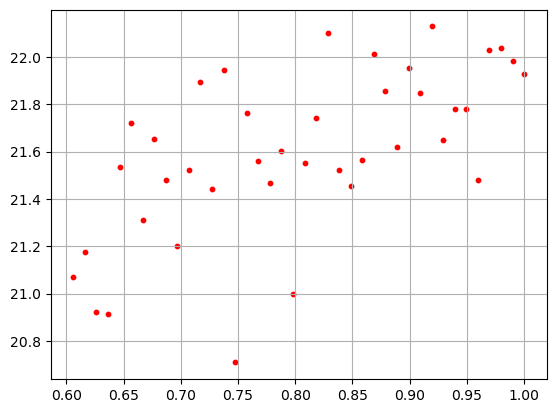

In [166]:
test_data_x = test_data[:, 1]
test_data_y = test_data[:, 2]
display_dot(test_data_x, test_data_y, "red")

Calculating the loss on test data

In [167]:
predicted_test_y = calculate_linear_regression(b0, b1, test_data_x)
test_loss = calculate_loss_function(test_data_y, predicted_test_y)
print(f"Result loss on test data = {test_loss}")

Result loss on test data = 0.07464431150254777


Finally, draw all data in dot view

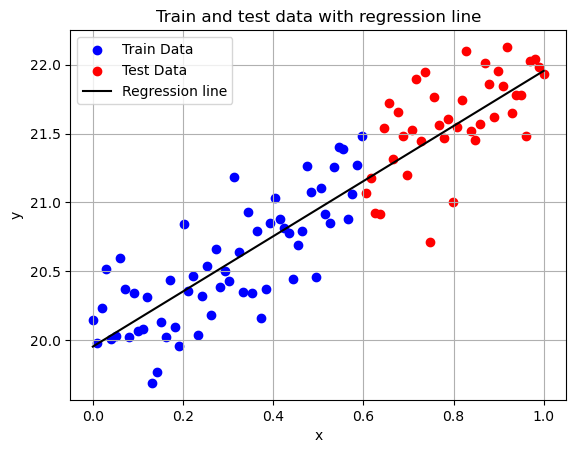

In [168]:
plot.scatter(train_data_x, train_data_y, color="blue", label="Train Data")
plot.scatter(test_data_x, test_data_y, color="red", label="Test Data")
combined_data_x = np.concatenate((train_data_x, test_data_x))
plot.plot(combined_data_x, calculate_linear_regression(b0, b1, combined_data_x), color="black", label="Regression line")
plot.xlabel("x")
plot.ylabel("y")
plot.grid(True)
plot.legend()
plot.title("Train and test data with regression line")
plot.show()